In [7]:
import pandas as pd
import numpy as np

In [8]:
raw_data = pd.read_csv("kc_house_data.csv")
raw_data.head()

,sqft,floors,bedrooms,bathrooms,price
0,5650,1.0,3,1.00,221900.0
1,7242,2.0,3,2.25,538000.0
2,10000,1.0,2,1.00,180000.0
3,5000,1.0,4,3.00,604000.0
4,8080,1.0,3,2.00,510000.0


In [9]:
data = np.array(raw_data)

In [10]:
no_of_examples = data.shape[0]
no_of_features = data.shape[1]-1

In [11]:
no_train = int(0.8*no_of_examples)
no_train

17290

In [12]:
X_train = data[:no_train,:-1]
y_train = data[:no_train,-1]
X_test = data[no_train:,:-1]
y_test = data[no_train:,-1].reshape(-1,1)

In [13]:
X_mean = np.mean(X_train,axis=0)
X_std = np.std(X_train,axis=0)
X_train = (X_train - X_mean)/X_std
X_test = (X_test-X_mean)/X_std

In [14]:
y_mean = np.mean(y_train,axis=0)
y_std = np.std(y_train,axis=0)
y_train = (y_train - y_mean)/y_std

In [15]:
class Linear_model:
    def __init__(self,m,X,y):
        #self.W = np.zeros((m,1))
        self.W = np.random.rand(m,1)
        self.b = 0
        self.X = X
        self.N = X.shape[0]
        self.y = y.reshape((self.N,1))
        
        
    def train(self, lr = 0.1, reg = 0):
        pred = (self.X).dot(self.W) + self.b
        err = pred - self.y
        err2 = err**2
        loss = np.sum(err2)/self.N
        loss += reg*np.sum(self.W**2)
        
        grad = (self.X).T.dot(err)
        grad *= 2/self.N
        
        grad += 2*reg*self.W
        
        self.W -= lr*grad
        self.b -= lr*np.sum(err)*2/self.N
        
        return loss
    
    def evaluate(self,X_test):
        return (X_test).dot(self.W) + self.b      
        
        
        

In [16]:
no_of_epochs = 500
model = Linear_model(no_of_features, X_train,y_train)
RMSE_plot = []
for i in range(no_of_epochs):
    loss = model.train(lr=0.05)
    print(loss)
    RMSE_plot.append(loss)

2.3226336542
1.94515626408
1.673268114
1.47487630396
1.32806780067
1.21780367157
1.13370120953
1.06854320296
1.01727374899
0.976320038963
0.943132876785
0.915874243731
0.893203937637
0.87413314163
0.857923348927
0.844016137691
0.831984020013
0.821495759069
0.812291676418
0.804165902456
0.796953487791
0.790520945329
0.784759235086
0.779578504704
0.774904104452
0.770673536916
0.766834099308
0.76334104436
0.760156133431
0.757246489131
0.754583678798
0.75214297741
0.749902771096
0.747844071606
0.745950118911
0.744206054257
0.742598649817
0.741116084053
0.739747754167
0.73848411877
0.737316565278
0.736237297618
0.735239240677
0.734315958613
0.733461584696
0.732670760737
0.731938584581
0.731260564352
0.730632578421
0.730050840203
0.729511867094
0.729012452923
0.728549643443
0.728120714435
0.727723152078
0.727354635301
0.72701301986
0.726696323931
0.72640271505
0.726130498235
0.725878105166
0.725644084311
0.725427091888
0.725225883604
0.725039307056
0.724866294772
0.724705857804
0.72455707982

In [17]:
import matplotlib.pyplot as plt

Text(0,0.5,'Mean Squared Error')

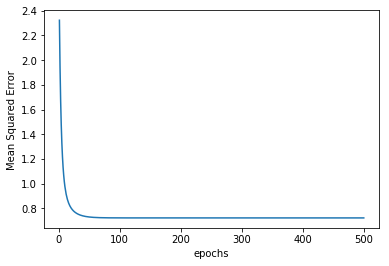

In [18]:
%matplotlib inline
plt.plot(1+np.array(range(no_of_epochs)),RMSE_plot)
plt.xlabel("epochs")
plt.ylabel("Mean Squared Error")

In [19]:
regs = [0,0.001,0.005,0.01,0.02,0.05,0.1,0.2,0.3,0.5,0.8,1.0,2.0,5.0]

In [20]:
loss_reg_train = []
loss_reg_test = []
no_of_epochs = 500
for r in regs:
    model = Linear_model(no_of_features,X_train,y_train)
    for i in range(no_of_epochs):
        loss = model.train(lr = 0.05,reg = r)
    loss_reg_train.append(loss)
    pred_test = model.evaluate(X_test)
    pred_test = (pred_test)*y_std + y_mean
    #test_loss = np.sqrt(np.sum(((pred_test - y_test)**2))/X_test.shape[0])
    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test)))
    loss_reg_test.append(test_loss)
    
loss_reg_test

[314935.64275284682,
 314941.72528921301,
 314967.18249891436,
 315001.4107721452,
 315077.138652327,
 315350.7334076938,
 315906.23839087621,
 317172.60977470898,
 318483.55044943164,
 321031.84487464075,
 324561.84004171216,
 326720.36872389028,
 335473.81020338275,
 349480.09171318408]

Text(0,0.5,'Mean Squared error (Train)')

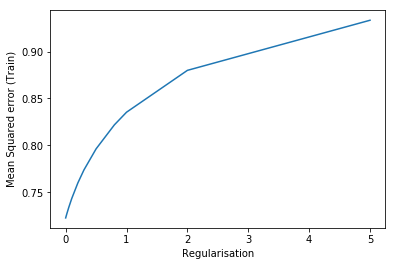

In [21]:
plt.plot(regs,loss_reg_train)
plt.xlabel("Regularisation")
plt.ylabel("Mean Squared error (Train)")

Text(0,0.5,'Mean Squared error (Test)')

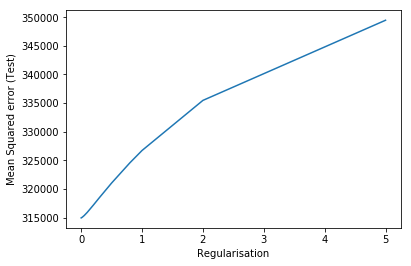

In [22]:
plt.plot(regs,loss_reg_test)
plt.xlabel("Regularisation")
plt.ylabel("Mean Squared error (Test)")